In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('s_cities.csv',index_col = 'Unnamed: 0')

df = df.loc[~df.geocode.isin([3135050, 3143302, 1716109, 3304102, 3141405, 2905008, 29005008])]

#le = LabelEncoder().fit(df['region'])
#region_labels = le.classes_
#df['region_codes'] = le.transform(df['region'])
#df['region_codes'] = df['region_codes'].astype('category')

df.head()

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik
8,2303501,Cascavel,2023,21.031323,0.448789,0.300973,1.491123,196.764406,0.329365,1.124633,202302,202339,37,23,CE,3,2017,2022,2016-10-01,2022-11-01
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,202302,202332,30,23,CE,3,2016,2022,2015-10-01,2022-11-01
88,2306801,Jaguaribara,2023,16.405845,0.742924,0.308515,2.408069,302.646554,0.584730,1.125556,202309,202325,16,23,CE,1,2017,2017,2016-10-01,2017-11-01
122,2305407,Icó,2023,13.682780,0.429925,0.300100,1.432607,87.124092,0.301972,1.434495,202302,202334,32,23,CE,2,2017,2022,2016-10-01,2022-11-01
152,2313203,Tamboril,2023,7.910365,0.955338,0.318621,2.998356,614.286383,0.666484,0.904167,202303,202314,11,23,CE,2,2016,2022,2015-10-01,2022-11-01


In [3]:
df.shape

(33, 20)

In [4]:
def get_score(geocode, label = 'RMSE_SS'): 
    
    f = open(f'../scores/lstm/scores_{geocode}_DL.json')

    s = json.load(f) 
    
    return s[label]['TL vs DL - dengue'], s[label]['TL vs DL - chik']

def process_row(row):
    ss_dengue, ss_chik  = get_score(geocode=row['geocode'])
    return pd.Series({'ss_lstm_dengue':ss_dengue, 'ss_lstm_chik': ss_chik})

# Aplicando a função a cada linha do DataFrame e atribuindo os resultados às novas colunas
df[['ss_lstm_dengue', 'ss_lstm_chik']] = df.apply(process_row, axis=1)

In [5]:
df.shape

(33, 22)

In [6]:
df.loc[(df.ss_lstm_dengue > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik
20,3127701,Governador Valadares,2023,16.839015,0.436746,0.300000,1.455820,771.985868,0.313102,1.971516,...,34,31,MG,3,2017,2022,2016-10-01,2022-11-01,0.717146,0.064870
8,2303501,Cascavel,2023,21.031323,0.448789,0.300973,1.491123,196.764406,0.329365,1.124633,...,37,23,CE,3,2017,2022,2016-10-01,2022-11-01,0.367141,-0.061724
40,3158953,Santana Do Paraíso,2023,19.169929,0.545679,0.306111,1.782617,356.444988,0.439027,1.335468,...,28,31,MG,1,2018,2018,2017-10-01,2018-11-01,0.333628,0.461875
76,2931350,Teixeira De Freitas,2023,19.669656,0.432621,0.301266,1.436011,699.395429,0.303627,1.311053,...,38,29,BA,5,2016,2022,2015-10-01,2022-11-01,0.312368,0.242167
9,1502400,Castanhal,2023,30.121367,0.408436,0.314390,1.299136,378.353228,0.230258,0.960773,...,43,15,PA,1,2018,2018,2017-10-01,2018-11-01,0.298626,0.397267
12,3168606,Teófilo Otoni,2023,8.986572,0.662300,0.300000,2.207668,3686.322773,0.547033,1.127226,...,17,31,MG,1,2017,2017,2016-10-01,2017-11-01,0.195273,0.310669
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,...,30,23,CE,3,2016,2022,2015-10-01,2022-11-01,0.170315,0.218386
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221846,0.471807,0.740549,...,26,31,MG,2,2017,2018,2016-10-01,2018-11-01,0.093572,0.135183
122,2305407,Icó,2023,13.682780,0.429925,0.300100,1.432607,87.124092,0.301972,1.434495,...,32,23,CE,2,2017,2022,2016-10-01,2022-11-01,0.084573,-0.018239
8,2112209,Timon,2023,9.563221,0.671695,0.300472,2.235465,228.745308,0.552666,0.640119,...,17,21,MA,1,2022,2022,2021-10-01,2022-11-01,0.080695,0.027291


In [7]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik
20,3127701,Governador Valadares,2023,16.839015,0.436746,0.300000,1.455820,771.985868,0.313102,1.971516,...,34,31,MG,3,2017,2022,2016-10-01,2022-11-01,0.717146,0.064870
40,3158953,Santana Do Paraíso,2023,19.169929,0.545679,0.306111,1.782617,356.444988,0.439027,1.335468,...,28,31,MG,1,2018,2018,2017-10-01,2018-11-01,0.333628,0.461875
76,2931350,Teixeira De Freitas,2023,19.669656,0.432621,0.301266,1.436011,699.395429,0.303627,1.311053,...,38,29,BA,5,2016,2022,2015-10-01,2022-11-01,0.312368,0.242167
9,1502400,Castanhal,2023,30.121367,0.408436,0.314390,1.299136,378.353228,0.230258,0.960773,...,43,15,PA,1,2018,2018,2017-10-01,2018-11-01,0.298626,0.397267
12,3168606,Teófilo Otoni,2023,8.986572,0.662300,0.300000,2.207668,3686.322773,0.547033,1.127226,...,17,31,MG,1,2017,2017,2016-10-01,2017-11-01,0.195273,0.310669
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,...,30,23,CE,3,2016,2022,2015-10-01,2022-11-01,0.170315,0.218386
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221846,0.471807,0.740549,...,26,31,MG,2,2017,2018,2016-10-01,2018-11-01,0.093572,0.135183
8,2112209,Timon,2023,9.563221,0.671695,0.300472,2.235465,228.745308,0.552666,0.640119,...,17,21,MA,1,2022,2022,2021-10-01,2022-11-01,0.080695,0.027291
65,3126703,Francisco Sá,2023,5.930340,0.744092,0.300065,2.479772,885.897822,0.596737,0.770150,...,12,31,MG,1,2022,2022,2021-10-01,2022-11-01,0.052736,0.164266
158,2905701,Camaçari,2023,26.615823,0.519108,0.302989,1.713291,267.084125,0.416328,1.498550,...,32,29,BA,2,2015,2019,2014-10-01,2019-11-01,0.039141,0.050781


In [8]:
df.loc[(df.ss_lstm_chik > 0)]

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,...,30,23,CE,3,2016,2022,2015-10-01,2022-11-01,0.170315,0.218386
88,2306801,Jaguaribara,2023,16.405845,0.742924,0.308515,2.408069,302.646554,0.584730,1.125556,...,16,23,CE,1,2017,2017,2016-10-01,2017-11-01,0.023355,0.024381
152,2313203,Tamboril,2023,7.910365,0.955338,0.318621,2.998356,614.286383,0.666484,0.904167,...,11,23,CE,2,2016,2022,2015-10-01,2022-11-01,-0.001860,0.044501
8,2112209,Timon,2023,9.563221,0.671695,0.300472,2.235465,228.745308,0.552666,0.640119,...,17,21,MA,1,2022,2022,2021-10-01,2022-11-01,0.080695,0.027291
18,2111300,São Luís,2023,20.364631,0.457691,0.300000,1.525638,2261.894509,0.344537,0.952037,...,36,21,MA,2,2016,2022,2015-10-01,2022-11-01,-0.131662,0.048322
12,3168606,Teófilo Otoni,2023,8.986572,0.662300,0.300000,2.207668,3686.322773,0.547033,1.127226,...,17,31,MG,1,2017,2017,2016-10-01,2017-11-01,0.195273,0.310669
20,3127701,Governador Valadares,2023,16.839015,0.436746,0.300000,1.455820,771.985868,0.313102,1.971516,...,34,31,MG,3,2017,2022,2016-10-01,2022-11-01,0.717146,0.064870
40,3158953,Santana Do Paraíso,2023,19.169929,0.545679,0.306111,1.782617,356.444988,0.439027,1.335468,...,28,31,MG,1,2018,2018,2017-10-01,2018-11-01,0.333628,0.461875
65,3126703,Francisco Sá,2023,5.930340,0.744092,0.300065,2.479772,885.897822,0.596737,0.770150,...,12,31,MG,1,2022,2022,2021-10-01,2022-11-01,0.052736,0.164266
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221846,0.471807,0.740549,...,26,31,MG,2,2017,2018,2016-10-01,2018-11-01,0.093572,0.135183


In [9]:
def add_pop(df):
    
    '''
    This function add the population information of the city
    '''
    
    pop = pd.read_csv('./poptcu2010-2022_rgi.csv', sep=',')

    pop.CODMUN7 = pop.CODMUN7.astype(int)

    populacao = df.apply(lambda row: pop[pop.CODMUN7==row[0]][f"POP{str(int(row[2]))[-2:]}"].values[0] if int(str(int(row[2]))[-2:])<23 else pop[pop.CODMUN7==row[0]][f"POP22"].values[0] , axis=1).to_numpy().tolist()
    
    df['populacao'] = populacao

    return df

In [10]:
df = add_pop(df)
df['inc'] = 100000*df.total_cases/df.populacao
df.head()

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
8,2303501,Cascavel,2023,21.031323,0.448789,0.300973,1.491123,196.764406,0.329365,1.124633,...,CE,3,2017,2022,2016-10-01,2022-11-01,0.367141,-0.061724,70498,279.106366
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,...,CE,3,2016,2022,2015-10-01,2022-11-01,0.170315,0.218386,78502,594.098884
88,2306801,Jaguaribara,2023,16.405845,0.742924,0.308515,2.408069,302.646554,0.584730,1.125556,...,CE,1,2017,2017,2016-10-01,2017-11-01,0.023355,0.024381,10344,2925.817416
122,2305407,Icó,2023,13.682780,0.429925,0.300100,1.432607,87.124092,0.301972,1.434495,...,CE,2,2017,2022,2016-10-01,2022-11-01,0.084573,-0.018239,62125,140.239987
152,2313203,Tamboril,2023,7.910365,0.955338,0.318621,2.998356,614.286383,0.666484,0.904167,...,CE,2,2016,2022,2015-10-01,2022-11-01,-0.001860,0.044501,24812,2475.763273


In [11]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
20,3127701,Governador Valadares,2023,16.839015,0.436746,0.300000,1.455820,771.985868,0.313102,1.971516,...,MG,3,2017,2022,2016-10-01,2022-11-01,0.717146,0.064870,262499,294.090975
40,3158953,Santana Do Paraíso,2023,19.169929,0.545679,0.306111,1.782617,356.444988,0.439027,1.335468,...,MG,1,2018,2018,2017-10-01,2018-11-01,0.333628,0.461875,37113,960.431622
76,2931350,Teixeira De Freitas,2023,19.669656,0.432621,0.301266,1.436011,699.395429,0.303627,1.311053,...,BA,5,2016,2022,2015-10-01,2022-11-01,0.312368,0.242167,147454,474.314314
9,1502400,Castanhal,2023,30.121367,0.408436,0.314390,1.299136,378.353228,0.230258,0.960773,...,PA,1,2018,2018,2017-10-01,2018-11-01,0.298626,0.397267,200003,189.173776
12,3168606,Teófilo Otoni,2023,8.986572,0.662300,0.300000,2.207668,3686.322773,0.547033,1.127226,...,MG,1,2017,2017,2016-10-01,2017-11-01,0.195273,0.310669,142030,2595.453617
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,...,CE,3,2016,2022,2015-10-01,2022-11-01,0.170315,0.218386,78502,594.098884
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221846,0.471807,0.740549,...,MG,2,2017,2018,2016-10-01,2018-11-01,0.093572,0.135183,211094,3122.410796
8,2112209,Timon,2023,9.563221,0.671695,0.300472,2.235465,228.745308,0.552666,0.640119,...,MA,1,2022,2022,2021-10-01,2022-11-01,0.080695,0.027291,175044,130.678748
65,3126703,Francisco Sá,2023,5.930340,0.744092,0.300065,2.479772,885.897822,0.596737,0.770150,...,MG,1,2022,2022,2021-10-01,2022-11-01,0.052736,0.164266,21504,4119.688533
158,2905701,Camaçari,2023,26.615823,0.519108,0.302989,1.713291,267.084125,0.416328,1.498550,...,BA,2,2015,2019,2014-10-01,2019-11-01,0.039141,0.050781,334195,79.918648


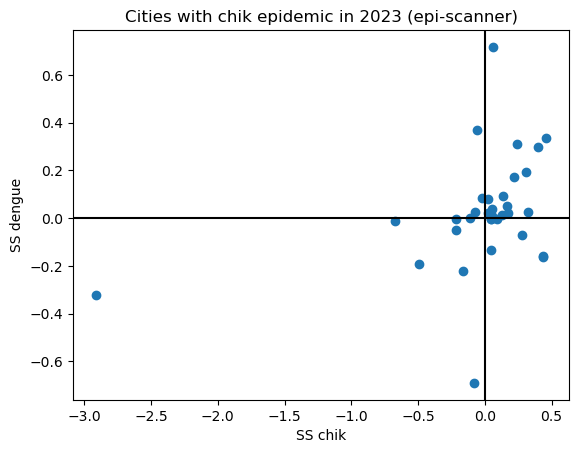

In [12]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue)

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.savefig('scatter_comp_all.png', dpi = 300)
plt.show()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_35950/1709593016.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.n_last_ep, cmap = cm.get_cmap('tab10', 5))


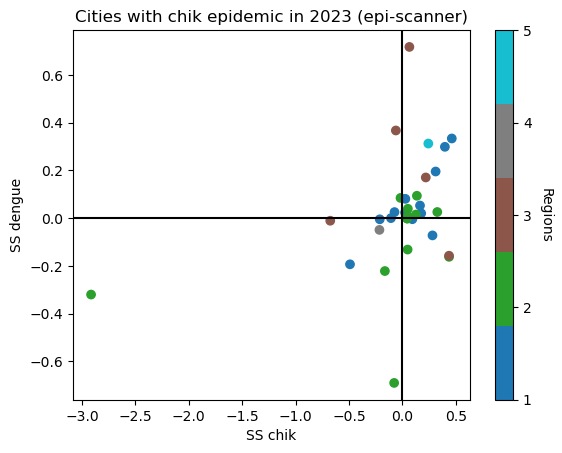

In [13]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.n_last_ep, cmap = cm.get_cmap('tab10', 5))

cbar = plt.colorbar()
cbar.set_ticks(np.arange(1,6))
#cbar.set_ticklabels(region_labels)

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('Regions', rotation=270, labelpad=15)


ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.savefig('scatter_comp_all_1.png', dpi = 300)

plt.show()

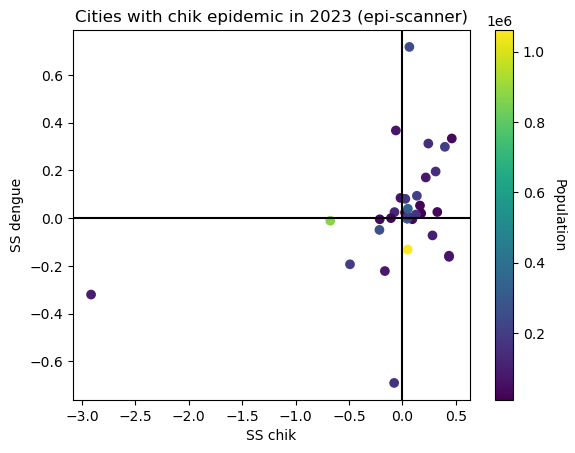

In [14]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.populacao) 

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('Population', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_2.png', dpi = 300)

plt.show()

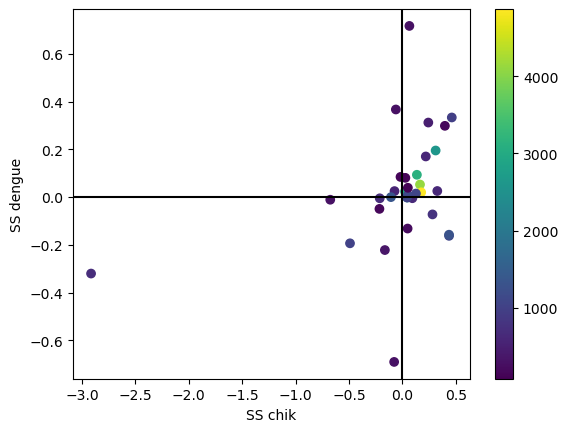

In [15]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.inc)

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_35950/1222382377.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))


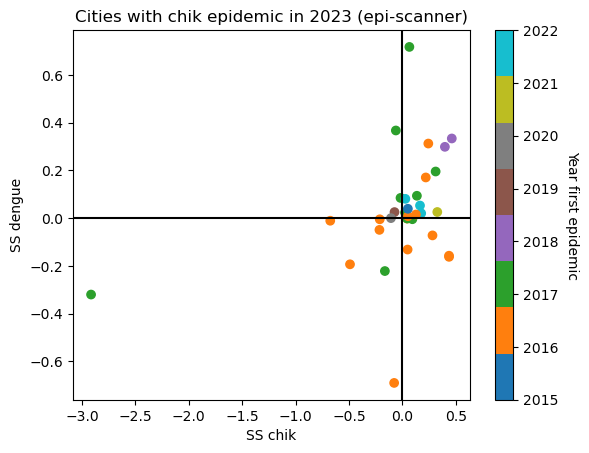

In [16]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('Year first epidemic', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_3.png', dpi = 300)

plt.show()

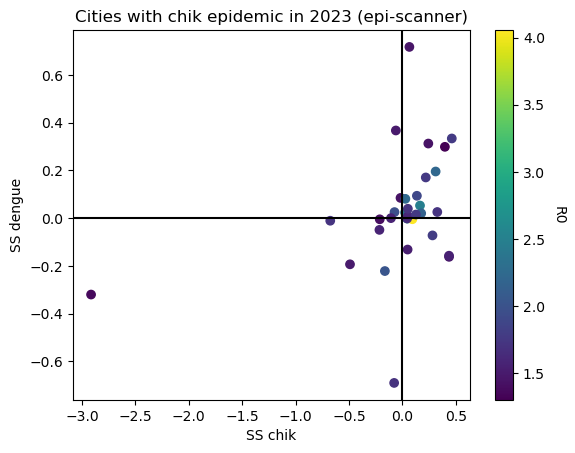

In [17]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.R0)

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('R0', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_4.png', dpi = 300)

plt.show()

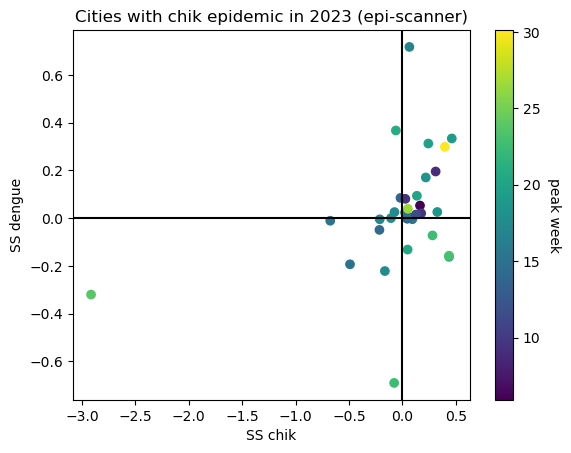

In [18]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.peak_week)

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('peak week', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_5.png', dpi = 300)

plt.show()

In [19]:
df.shape

(33, 24)

In [20]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)]

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
86,2311405,Quixeramobim,2023,18.375030,0.534700,0.304761,1.754491,466.379506,0.430034,0.930290,...,CE,3,2016,2022,2015-10-01,2022-11-01,0.170315,0.218386,78502,594.098884
88,2306801,Jaguaribara,2023,16.405845,0.742924,0.308515,2.408069,302.646554,0.584730,1.125556,...,CE,1,2017,2017,2016-10-01,2017-11-01,0.023355,0.024381,10344,2925.817416
8,2112209,Timon,2023,9.563221,0.671695,0.300472,2.235465,228.745308,0.552666,0.640119,...,MA,1,2022,2022,2021-10-01,2022-11-01,0.080695,0.027291,175044,130.678748
12,3168606,Teófilo Otoni,2023,8.986572,0.662300,0.300000,2.207668,3686.322773,0.547033,1.127226,...,MG,1,2017,2017,2016-10-01,2017-11-01,0.195273,0.310669,142030,2595.453617
20,3127701,Governador Valadares,2023,16.839015,0.436746,0.300000,1.455820,771.985868,0.313102,1.971516,...,MG,3,2017,2022,2016-10-01,2022-11-01,0.717146,0.064870,262499,294.090975
40,3158953,Santana Do Paraíso,2023,19.169929,0.545679,0.306111,1.782617,356.444988,0.439027,1.335468,...,MG,1,2018,2018,2017-10-01,2018-11-01,0.333628,0.461875,37113,960.431622
65,3126703,Francisco Sá,2023,5.930340,0.744092,0.300065,2.479772,885.897822,0.596737,0.770150,...,MG,1,2022,2022,2021-10-01,2022-11-01,0.052736,0.164266,21504,4119.688533
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221846,0.471807,0.740549,...,MG,2,2017,2018,2016-10-01,2018-11-01,0.093572,0.135183,211094,3122.410796
9,1502400,Castanhal,2023,30.121367,0.408436,0.314390,1.299136,378.353228,0.230258,0.960773,...,PA,1,2018,2018,2017-10-01,2018-11-01,0.298626,0.397267,200003,189.173776
1,5002308,Brasilândia,2023,9.630161,0.711847,0.330000,2.157114,566.644798,0.536418,1.001591,...,MS,1,2022,2022,2021-10-01,2022-11-01,0.020091,0.175446,11634,4870.593073


In [21]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)].populacao.describe()

count        15.000000
mean     133743.266667
std       99348.854307
min       10344.000000
25%       33805.000000
50%      147454.000000
75%      192751.500000
max      334195.000000
Name: populacao, dtype: float64

In [22]:
df.loc[(df.ss_lstm_dengue <= 0) | (df.ss_lstm_chik <= 0)].populacao.describe()

count    1.800000e+01
mean     2.051374e+05
std      2.907011e+05
min      2.363300e+04
25%      6.278650e+04
50%      9.616050e+04
75%      1.886440e+05
max      1.061374e+06
Name: populacao, dtype: float64

In [23]:
df_p = df.loc[df.populacao > 100000]

In [24]:
df_p.shape

(17, 24)

In [25]:
df_p.loc[df_p.ss_lstm_dengue > 0].shape

(10, 24)

In [26]:
df_p.loc[df_p.ss_lstm_chik > 0].shape

(12, 24)

In [27]:
df_p.loc[(df_p.ss_lstm_dengue > 0) & (df_p.ss_lstm_chik > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
20,3127701,Governador Valadares,2023,16.839015,0.436746,0.300000,1.455820,771.985868,0.313102,1.971516,...,MG,3,2017,2022,2016-10-01,2022-11-01,0.717146,0.064870,262499,294.090975
76,2931350,Teixeira De Freitas,2023,19.669656,0.432621,0.301266,1.436011,699.395429,0.303627,1.311053,...,BA,5,2016,2022,2015-10-01,2022-11-01,0.312368,0.242167,147454,474.314314
9,1502400,Castanhal,2023,30.121367,0.408436,0.314390,1.299136,378.353228,0.230258,0.960773,...,PA,1,2018,2018,2017-10-01,2018-11-01,0.298626,0.397267,200003,189.173776
12,3168606,Teófilo Otoni,2023,8.986572,0.662300,0.300000,2.207668,3686.322773,0.547033,1.127226,...,MG,1,2017,2017,2016-10-01,2017-11-01,0.195273,0.310669,142030,2595.453617
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221846,0.471807,0.740549,...,MG,2,2017,2018,2016-10-01,2018-11-01,0.093572,0.135183,211094,3122.410796
8,2112209,Timon,2023,9.563221,0.671695,0.300472,2.235465,228.745308,0.552666,0.640119,...,MA,1,2022,2022,2021-10-01,2022-11-01,0.080695,0.027291,175044,130.678748
158,2905701,Camaçari,2023,26.615823,0.519108,0.302989,1.713291,267.084125,0.416328,1.498550,...,BA,2,2015,2019,2014-10-01,2019-11-01,0.039141,0.050781,334195,79.918648
84,2925303,Porto Seguro,2023,11.522617,0.528174,0.300000,1.760578,1695.361609,0.432005,1.113876,...,BA,2,2016,2017,2015-10-01,2017-11-01,0.015016,0.126155,158736,1068.038510
48,2914802,Itabuna,2023,14.845640,0.484635,0.304205,1.593120,2117.745290,0.372301,1.023761,...,BA,2,2016,2022,2015-10-01,2022-11-01,0.008119,0.051564,185500,1141.641666


In [28]:
df_p.geocode.values

array([2112209, 2111300, 3168606, 3127701, 3103504, 3131307, 2408003,
       2211001, 2207702, 1502400, 1721000, 2928703, 2914802, 2931350,
       2925303, 2913606, 2905701])

In [29]:
df = df_p

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_35950/3705494107.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))


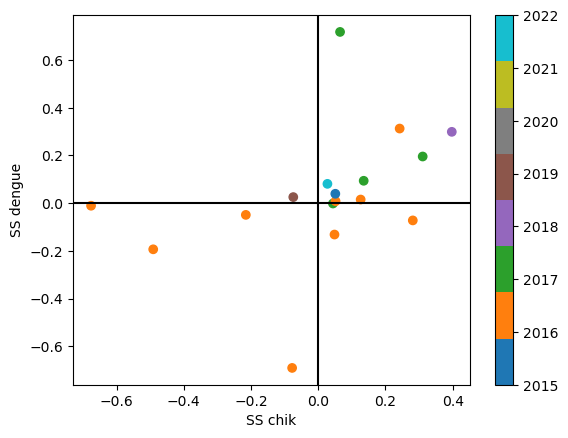

In [30]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))

cbar = plt.colorbar()
#cbar.set_ticks(np.arange(1,6))
#cbar.set_ticklabels(region_labels)

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

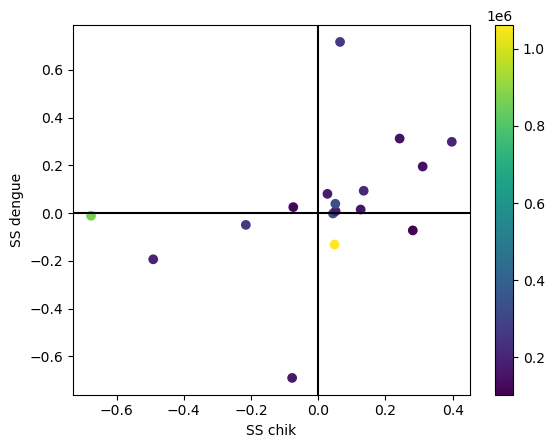

In [31]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.populacao) 

cbar = plt.colorbar()

#cbar.set_ticklabels(region_labels)

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

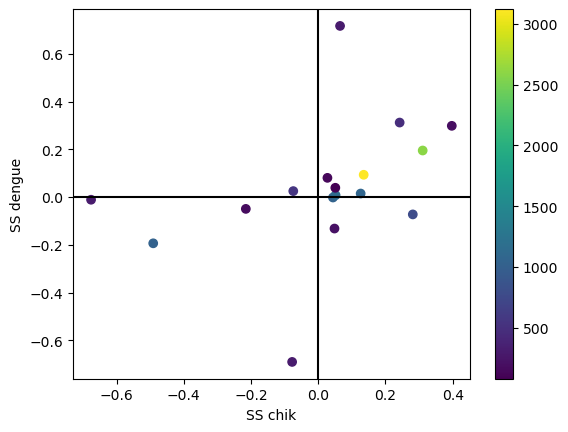

In [32]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.inc) 

cbar = plt.colorbar()
#cbar.set_ticklabels(region_labels)

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

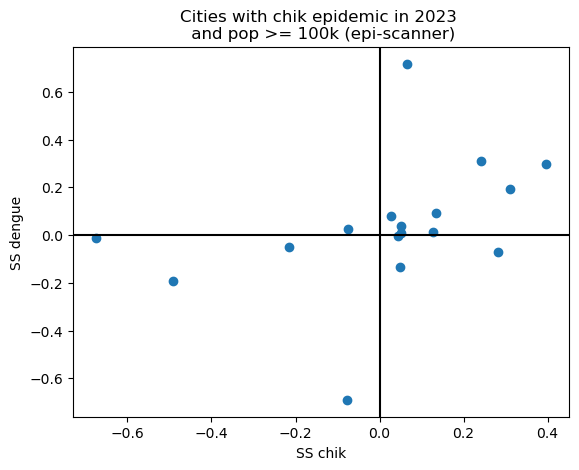

In [33]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue)

ax.set_title('Cities with chik epidemic in 2023 \n and pop >= 100k (epi-scanner)')
ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.savefig('scatter_comp_all_pop_100k.png', dpi = 300)
plt.show()

In [34]:
df_p.shape

(17, 24)